# Analyze Time-Series

In [114]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile
from pathlib import Path

In [2]:
FOLDER = '2nd_wave_wag'

## Check Data

In [5]:
# Check files needed
folder_path = Path(os.getcwd()) / FOLDER
if not folder_path.is_dir():
    raise ValueError(f"{folder_path} is not a valid folder!")

var_table_file = folder_path / 'var_table.csv'
if not var_table_file.is_file():
    raise ValueError(f"{var_table_file} was not found!")

group_csv_file = folder_path / 'group_csv.zip'
if not group_csv_file.is_file():
    raise ValueError(f"{group_csv_file} was not found!")

all_csv_file = folder_path / 'csv.zip'
if not all_csv_file.is_file():
    # raise ValueError(f"{all_csv_file} was not found!")
    print(f"{all_csv_file} was not found!")
    all_csv_file = None

In [6]:
def list_files_zip(zip_file_path):
    file_list = []
    with ZipFile(zip_file_path, 'r') as zip_obj:
        zip_info_list = zip_obj.infolist()
        for zip_info in zip_info_list:
            file_list.append(zip_info.filename)
    return file_list

In [21]:
var_table = pd.read_csv(var_table_file, index_col=0)
n_runs = len(var_table)
print(f'Number of runs: {n_runs}')
for k in var_table.keys():
    print(f'  {k}: {len(set(var_table[k]))} values.')

n_csv_group = len(list_files_zip(group_csv_file))
if n_csv_group != n_runs:
    raise ValueError(f'Number os CSV files in {group_csv_file.name} ({n_csv_group}) does not match master table ({n_runs}).')

if all_csv_file:
    n_csv_all = len(list_files_zip(all_csv_file))
    if n_csv_all != n_runs:
        raise ValueError(f'Number os CSV files in {group_csv_file.name} ({n_csv_all}) does not match master table ({n_runs}).')

Number of runs: 900
  prior: 100 values.
  eos: 1 values.
  kr: 1 values.
  sch: 9 values.


## Fetch Data

In [109]:
def get_variables():
    return list(var_table.keys())

def get_variable_values(k):
    if k in var_table.keys():
        return set(var_table[k])
    return {}

def get_indexes(filters):
    df = var_table
    for k,v in filters.items():
        df = df[df[k]==v]
    return df.index

def get_df(index, all_data=False):
    zip_file = group_csv_file
    filename = f'sens_{index}_group.csv'
    if all_data:
        if all_csv_file is None:
            raise ValueError(f'{all_csv_file} was not found!')
        zip_file = all_csv_file
        filename = f'sens_{index}.csv'

    file_list = list_files_zip(zip_file)
    if filename not in file_list:
        raise ValueError(f'{filename} was not found in {zip_file.name}!')

    with ZipFile(zip_file, 'r') as zip_obj:
        with zip_obj.open(filename) as f:
            df = pd.read_csv(f)
    return df

def make_composite_df(indexes, column, all_data=False):
    if len(indexes) == 0:
        raise ValueError('At least index is needed.')
    df = get_df(indexes[0], all_data=all_data)
    if column not in df.columns:
        raise ValueError(f'{column} not found in dataframe columns.')
    new_df = pd.DataFrame(columns=df.index)
    new_df.loc[indexes[0]] = df[column].transpose()
    for i in indexes[1:]:
        new_df.loc[i] = get_df(i, all_data=all_data)[column].transpose()
    return new_df

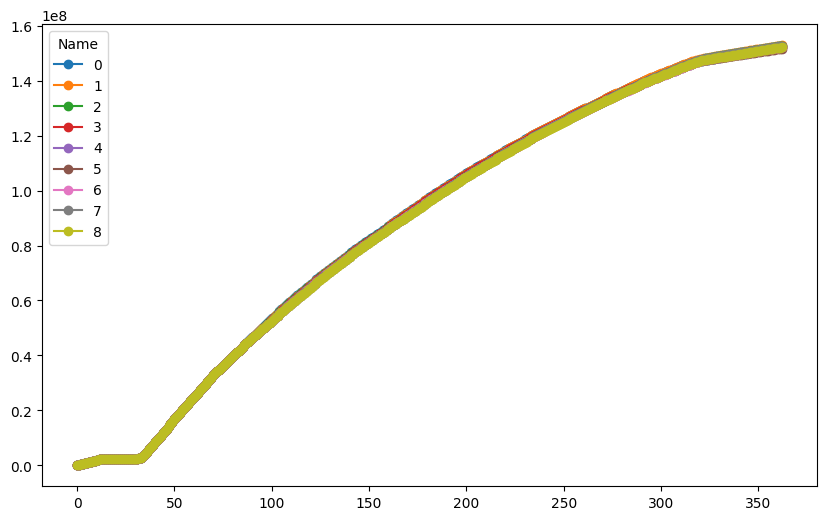

In [120]:
df = make_composite_df(indexes=get_indexes({'prior':1}), column='FIELD-PRO:NP')

df_pivot = df.transpose()

df_pivot.plot(kind='line', marker='o', figsize=(10, 6))
# plt.xlabel('Year')
# plt.ylabel('Weight')
# plt.title('Weight Development Over Years')
plt.legend(title='Name')

# Show the plot
plt.show()

In [119]:
df

,0,1,2,3,4,5,6,7,8,9,...,353,354,355,356,357,358,359,360,361,362
0,0.0,6394.088778,6382.720718,6325.363523,6321.226596,0.0,6380.590479,6361.403436,6331.876889,0.0,...,3871.901426,3878.658524,3880.389628,3886.932924,3894.147510,3898.678617,3903.371968,3922.927935,3904.961778,3924.688844
1,0.0,6394.088778,6382.720718,6325.363523,6321.226596,0.0,6380.590479,6361.403436,6331.876889,0.0,...,3831.371404,3845.142247,3879.732414,3889.112987,3885.738257,3896.154430,3904.719526,3906.262828,3928.916834,3905.950814
2,0.0,6394.088778,6382.720718,6325.363523,6321.226596,0.0,6380.590479,6361.403436,6331.876889,0.0,...,3832.403093,3833.769485,3839.533857,3843.155276,3847.685674,3835.105555,3837.036962,3837.868988,3832.205300,3832.226061
3,0.0,6394.088778,6382.720718,6325.363523,6321.226596,0.0,6380.590479,6361.403436,6331.876889,0.0,...,3767.854590,3752.961638,3761.984743,3769.068779,3775.404801,3778.448747,3785.414191,3788.320239,3795.782123,3782.581144
4,0.0,6394.088778,6382.720718,6325.363523,6321.226596,0.0,6380.590479,6361.403436,6331.876889,0.0,...,3762.059179,3767.519385,3769.403104,3796.074065,3807.124886,3808.694162,3793.617699,3799.683328,3802.426925,3769.321155
5,0.0,6394.088778,6382.720718,6325.363523,6321.226596,0.0,6380.590479,6361.403436,6331.876889,0.0,...,3338.225690,3330.904115,3331.294426,3333.729745,3335.881927,3342.168065,3344.786641,3368.699235,3362.975250,3338.647178
6,0.0,6394.088778,6382.720718,6325.363523,6321.226596,0.0,6380.590479,6361.403436,6331.876889,0.0,...,3803.592447,3809.907727,3813.375006,3816.831378,3817.522494,3802.635561,3791.494422,3793.567602,3783.361553,3792.788648
7,0.0,6394.088778,6382.720718,6325.363523,6321.226596,0.0,6380.590479,6361.403436,6331.876889,0.0,...,3855.986423,3858.678155,3861.005119,3853.606460,3857.844881,3858.975291,3850.058820,3848.572709,3855.332215,3860.601695
8,0.0,6394.088778,6382.720718,6325.363523,6321.226596,0.0,6380.590479,6361.403436,6331.876889,0.0,...,3864.235204,3865.885267,3863.997095,3853.388179,3838.923617,3840.122409,3843.433971,3836.149877,3853.525915,3858.430607


In [112]:
make_composite_df([0,2], 'FIELD-PRO:QO', all_data=True)


,0,1,2,3,4,5,6,7,8,9,...,353,354,355,356,357,358,359,360,361,362
0,0.0,6394.088778,6382.720718,6325.363523,6321.226596,0.0,6380.590479,6361.403436,6331.876889,0.0,...,3871.901426,3878.658524,3880.389628,3886.932924,3894.147510,3898.678617,3903.371968,3922.927935,3904.961778,3924.688844
2,0.0,6394.088778,6382.720718,6325.363523,6321.226596,0.0,6380.590479,6361.403436,6331.876889,0.0,...,3832.403093,3833.769485,3839.533857,3843.155276,3847.685674,3835.105555,3837.036962,3837.868988,3832.205300,3832.226061


In [92]:
get_df(1)['FIELD-PRO:NP'].iat[-1]

152898683.6295137

In [99]:
get_df(1).columns

Index(['Date', 'FIELD-PRO:QO', 'FIELD-PRO:QW', 'FIELD-PRO:QG', 'FIELD-PRO:NP',
       'FIELD-PRO:GP', 'FIELD-PRO:WP', 'FIELD-PRO:QO_RC', 'FIELD-PRO:QG_RC',
       'FIELD-PRO:QW_RC', 'FIELD-INJ:QO', 'FIELD-INJ:QW', 'FIELD-INJ:QG',
       'FIELD-INJ:NP', 'FIELD-INJ:GP', 'FIELD-INJ:WP', 'FIELD-INJ:QO_RC',
       'FIELD-INJ:QG_RC', 'FIELD-INJ:QW_RC'],
      dtype='object')

In [82]:
get_indexes({'sch':'2027.01.01'})

Index([  4,  13,  22,  31,  40,  49,  58,  67,  76,  85,  94, 103, 112, 121,
       130, 139, 148, 157, 166, 175, 184, 193, 202, 211, 220, 229, 238, 247,
       256, 265, 274, 283, 292, 301, 310, 319, 328, 337, 346, 355, 364, 373,
       382, 391, 400, 409, 418, 427, 436, 445, 454, 463, 472, 481, 490, 499,
       508, 517, 526, 535, 544, 553, 562, 571, 580, 589, 598, 607, 616, 625,
       634, 643, 652, 661, 670, 679, 688, 697, 706, 715, 724, 733, 742, 751,
       760, 769, 778, 787, 796, 805, 814, 823, 832, 841, 850, 859, 868, 877,
       886, 895],
      dtype='int64')

In [42]:
var_table[var_table['prior']==10].index

Index([81, 82, 83, 84, 85, 86, 87, 88, 89], dtype='int64')

In [23]:
get_variables()

['prior', 'eos', 'kr', 'sch']

In [36]:
get_variable_values('sch')

{'2026.01.01',
 '2026.04.01',
 '2026.07.01',
 '2026.10.01',
 '2027.01.01',
 '2027.04.01',
 '2027.07.01',
 '2027.10.01',
 '2028.01.01'}